# <span style="color:rgb(255, 0, 255)">LAB FEATURE EXTRACTION | AINARA GUERRA </span> 

# <span style="color:rgb(255, 0, 255)"> Instructions  </span> 

For this lab, we will be using the same dataset we used in the previous labs. We recommend using the same notebook since you will be reusing the same variables you previous created and used in labs.


So far we have worked on EDA. This lab will focus on data cleaning and wrangling from everything we noticed before.

1. We will start with removing outliers. So far, we have discussed different methods to remove outliers. Use the one you feel more comfortable with, define a function for that. Use the function to remove the outliers and apply it to the dataframe.
2. Create a copy of the dataframe for the data wrangling.
3. Normalize the continuous variables. You can use any one method you want.
4. Encode the categorical variables
5. The time variable can be useful. Try to transform its data into a useful one. Hint: Day week and month as integers might be useful.
6. Since the model will only accept numerical data, check and make sure that every column is numerical, if some are not, change it using encoding.

Hint for Categorical Variables

    You should deal with the categorical variables as shown below (for ordinal encoding, dummy code has been provided as well):
    One hot to state
    Ordinal to coverage
    Ordinal to employmentstatus
    Ordinal to location code
    One hot to marital status
    One hot to policy type
    One hot to policy
    One hot to renew offercustomer_df
    One hot to sales channel
    One hot vehicle class
    Ordinal vehicle size

    data["coverage"] = data["coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})
    given that column "coverage" in the dataframe "data" has three categories:
    "basic", "extended", and "premium" and values are to be represented in the same order.

# <span style="color:rgb(255, 0, 255)">--- Previous steps for the lab </span>

### <span style="color:rgb(255, 0, 255)">--- Import the necessary libraries if you are starting a new notebook. </span>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import matplotlib.ticker as mk
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

import os #we will use the function listdir to list files in a folder
import math #to apply absolute value

### <span style="color:rgb(255, 0, 255)">--- Load the csv. Use the variable customer_df as customer_df = pd.read_csv().</span>

In [2]:
data = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')
data.head()

Customer       State  Customer Lifetime Value Response  Coverage Education  \
0  BU79786  Washington              2763.519279       No     Basic  Bachelor   
1  QZ44356     Arizona              6979.535903       No  Extended  Bachelor   
2  AI49188      Nevada             12887.431650       No   Premium  Bachelor   
3  WW63253  California              7645.861827       No     Basic  Bachelor   
4  HB64268  Washington              2813.692575       No     Basic  Bachelor   

  Effective To Date EmploymentStatus Gender  Income Location Code  \
0           2/24/11         Employed      F   56274      Suburban   
1           1/31/11       Unemployed      F       0      Suburban   
2           2/19/11         Employed      F   48767      Suburban   
3           1/20/11       Unemployed      M       0      Suburban   
4            2/3/11         Employed      M   43836         Rural   

  Marital Status  Monthly Premium Auto  Months Since Last Claim  \
0        Married                    69                       32   
1         Single                    94                       13   
2        Married                   108                       18   
3        Married                   106                       18   
4         Single                    73                       12   

   Months Since Policy Inception  Number of Open Complaints  \
0                              5                          0   
1                             42                          0   
2                             38                          0   
3                             65                          0   
4                             44                          0   

   Number of Policies     Policy Type        Policy Renew Offer Type  \
0                   1  Corporate Auto  Corporate L3           Offer1   
1                   8   Personal Auto   Personal L3           Offer3   
2                   2   Personal Auto   Personal L3           Offer1   
3                   7  Corporate Auto  Corporate L2           Offer1   
4                   1   Personal Auto   Personal L1           Offer1   

  Sales Channel  Total Claim Amount  Vehicle Class Vehicle Size  
0         Agent          384.811147   Two-Door Car      Medsize  
1         Agent         1131.464935  Four-Door Car      Medsize  
2         Agent          566.472247   Two-Door Car      Medsize  
3   Call Center          529.881344            SUV      Medsize  
4         Agent          138.130879  Four-Door Car      Medsize

### <span style="color:rgb(255, 0, 255)">--- Let's look at its main features (head, shape, info) and do some minor changes.</span>

In [3]:
data.shape

(9134, 24)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [5]:
data.describe()

Customer Lifetime Value        Income  Monthly Premium Auto  \
count              9134.000000   9134.000000           9134.000000   
mean               8004.940475  37657.380009             93.219291   
std                6870.967608  30379.904734             34.407967   
min                1898.007675      0.000000             61.000000   
25%                3994.251794      0.000000             68.000000   
50%                5780.182197  33889.500000             83.000000   
75%                8962.167041  62320.000000            109.000000   
max               83325.381190  99981.000000            298.000000   

       Months Since Last Claim  Months Since Policy Inception  \
count              9134.000000                    9134.000000   
mean                 15.097000                      48.064594   
std                  10.073257                      27.905991   
min                   0.000000                       0.000000   
25%                   6.000000                      24.000000   
50%                  14.000000                      48.000000   
75%                  23.000000                      71.000000   
max                  35.000000                      99.000000   

       Number of Open Complaints  Number of Policies  Total Claim Amount  
count                9134.000000         9134.000000         9134.000000  
mean                    0.384388            2.966170          434.088794  
std                     0.910384            2.390182          290.500092  
min                     0.000000            1.000000            0.099007  
25%                     0.000000            1.000000          272.258244  
50%                     0.000000            2.000000          383.945434  
75%                     0.000000            4.000000          547.514839  
max                     5.000000            9.000000         2893.239678

In [6]:
#let's see first if we have any duplicated rows with nan values in those rows aka no info in that entry
duplicate_rows = data[data.duplicated()]
duplicate_rows

Empty DataFrame
Columns: [Customer, State, Customer Lifetime Value, Response, Coverage, Education, Effective To Date, EmploymentStatus, Gender, Income, Location Code, Marital Status, Monthly Premium Auto, Months Since Last Claim, Months Since Policy Inception, Number of Open Complaints, Number of Policies, Policy Type, Policy, Renew Offer Type, Sales Channel, Total Claim Amount, Vehicle Class, Vehicle Size]
Index: []

In [7]:
data.isna().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [8]:
data.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [9]:
cols = [col_name.lower().replace(' ', '_') for col_name in data]
data.columns = cols
data.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [10]:
data = data.drop(['customer'], axis=1)
data.head()

state  customer_lifetime_value response  coverage education  \
0  Washington              2763.519279       No     Basic  Bachelor   
1     Arizona              6979.535903       No  Extended  Bachelor   
2      Nevada             12887.431650       No   Premium  Bachelor   
3  California              7645.861827       No     Basic  Bachelor   
4  Washington              2813.692575       No     Basic  Bachelor   

  effective_to_date employmentstatus gender  income location_code  \
0           2/24/11         Employed      F   56274      Suburban   
1           1/31/11       Unemployed      F       0      Suburban   
2           2/19/11         Employed      F   48767      Suburban   
3           1/20/11       Unemployed      M       0      Suburban   
4            2/3/11         Employed      M   43836         Rural   

  marital_status  monthly_premium_auto  months_since_last_claim  \
0        Married                    69                       32   
1         Single                    94                       13   
2        Married                   108                       18   
3        Married                   106                       18   
4         Single                    73                       12   

   months_since_policy_inception  number_of_open_complaints  \
0                              5                          0   
1                             42                          0   
2                             38                          0   
3                             65                          0   
4                             44                          0   

   number_of_policies     policy_type        policy renew_offer_type  \
0                   1  Corporate Auto  Corporate L3           Offer1   
1                   8   Personal Auto   Personal L3           Offer3   
2                   2   Personal Auto   Personal L3           Offer1   
3                   7  Corporate Auto  Corporate L2           Offer1   
4                   1   Personal Auto   Personal L1           Offer1   

  sales_channel  total_claim_amount  vehicle_class vehicle_size  
0         Agent          384.811147   Two-Door Car      Medsize  
1         Agent         1131.464935  Four-Door Car      Medsize  
2         Agent          566.472247   Two-Door Car      Medsize  
3   Call Center          529.881344            SUV      Medsize  
4         Agent          138.130879  Four-Door Car      Medsize

### <span style="color:rgb(255, 0, 255)">--- Load the continuous and discrete variables into numericals_df and categorical_df variables</span>

In [11]:
num = data.select_dtypes(include = np.number)
cat = data.select_dtypes(include = np.object)

In [12]:
num.head()

customer_lifetime_value  income  monthly_premium_auto  \
0              2763.519279   56274                    69   
1              6979.535903       0                    94   
2             12887.431650   48767                   108   
3              7645.861827       0                   106   
4              2813.692575   43836                    73   

   months_since_last_claim  months_since_policy_inception  \
0                       32                              5   
1                       13                             42   
2                       18                             38   
3                       18                             65   
4                       12                             44   

   number_of_open_complaints  number_of_policies  total_claim_amount  
0                          0                   1          384.811147  
1                          0                   8         1131.464935  
2                          0                   2          566.472247  
3                          0                   7          529.881344  
4                          0                   1          138.130879

In [13]:
cat.head()

state response  coverage education effective_to_date employmentstatus  \
0  Washington       No     Basic  Bachelor           2/24/11         Employed   
1     Arizona       No  Extended  Bachelor           1/31/11       Unemployed   
2      Nevada       No   Premium  Bachelor           2/19/11         Employed   
3  California       No     Basic  Bachelor           1/20/11       Unemployed   
4  Washington       No     Basic  Bachelor            2/3/11         Employed   

  gender location_code marital_status     policy_type        policy  \
0      F      Suburban        Married  Corporate Auto  Corporate L3   
1      F      Suburban         Single   Personal Auto   Personal L3   
2      F      Suburban        Married   Personal Auto   Personal L3   
3      M      Suburban        Married  Corporate Auto  Corporate L2   
4      M         Rural         Single   Personal Auto   Personal L1   

  renew_offer_type sales_channel  vehicle_class vehicle_size  
0           Offer1         Agent   Two-Door Car      Medsize  
1           Offer3         Agent  Four-Door Car      Medsize  
2           Offer1         Agent   Two-Door Car      Medsize  
3           Offer1   Call Center            SUV      Medsize  
4           Offer1         Agent  Four-Door Car      Medsize

### <span style="color:rgb(255, 0, 255)">--- There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?

</span>

In [14]:
cat['policy'].value_counts()

Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: policy, dtype: int64

In [15]:
policy_map = {
    'Personal L3': 'Personal',
    'Personal L2': 'Personal',
    'Personal L1': 'Personal',
    'Corporate L3': 'Corporate',
    'Corporate L2': 'Corporate',
    'Corporate L1': 'Corporate',
    'Special L2': 'Special',
    'Special L3': 'Special',
    'Special L1': 'Special'
}

# Apply the mapping function to create a new column named "policy_type"
data['policy_type'] = data['policy'].apply(lambda x: policy_map[x])
data['policy_type'].value_counts()

Personal     6788
Corporate    1968
Special       378
Name: policy_type, dtype: int64

In [16]:
# Update the categoricals with this new column

cat = data.select_dtypes(include = np.object)
cat.head()

state response  coverage education effective_to_date employmentstatus  \
0  Washington       No     Basic  Bachelor           2/24/11         Employed   
1     Arizona       No  Extended  Bachelor           1/31/11       Unemployed   
2      Nevada       No   Premium  Bachelor           2/19/11         Employed   
3  California       No     Basic  Bachelor           1/20/11       Unemployed   
4  Washington       No     Basic  Bachelor            2/3/11         Employed   

  gender location_code marital_status policy_type        policy  \
0      F      Suburban        Married   Corporate  Corporate L3   
1      F      Suburban         Single    Personal   Personal L3   
2      F      Suburban        Married    Personal   Personal L3   
3      M      Suburban        Married   Corporate  Corporate L2   
4      M         Rural         Single    Personal   Personal L1   

  renew_offer_type sales_channel  vehicle_class vehicle_size  
0           Offer1         Agent   Two-Door Car      Medsize  
1           Offer3         Agent  Four-Door Car      Medsize  
2           Offer1         Agent   Two-Door Car      Medsize  
3           Offer1   Call Center            SUV      Medsize  
4           Offer1         Agent  Four-Door Car      Medsize

In [17]:
#let's drop the policy column because with don't need it. 
cat = cat.drop(['policy'], axis=1)
cat.head()

state response  coverage education effective_to_date employmentstatus  \
0  Washington       No     Basic  Bachelor           2/24/11         Employed   
1     Arizona       No  Extended  Bachelor           1/31/11       Unemployed   
2      Nevada       No   Premium  Bachelor           2/19/11         Employed   
3  California       No     Basic  Bachelor           1/20/11       Unemployed   
4  Washington       No     Basic  Bachelor            2/3/11         Employed   

  gender location_code marital_status policy_type renew_offer_type  \
0      F      Suburban        Married   Corporate           Offer1   
1      F      Suburban         Single    Personal           Offer3   
2      F      Suburban        Married    Personal           Offer1   
3      M      Suburban        Married   Corporate           Offer1   
4      M         Rural         Single    Personal           Offer1   

  sales_channel  vehicle_class vehicle_size  
0         Agent   Two-Door Car      Medsize  
1         Agent  Four-Door Car      Medsize  
2         Agent   Two-Door Car      Medsize  
3   Call Center            SUV      Medsize  
4         Agent  Four-Door Car      Medsize

### <span style="color:rgb(255, 0, 255)">--- Visualize categoricals and numericals

</span>

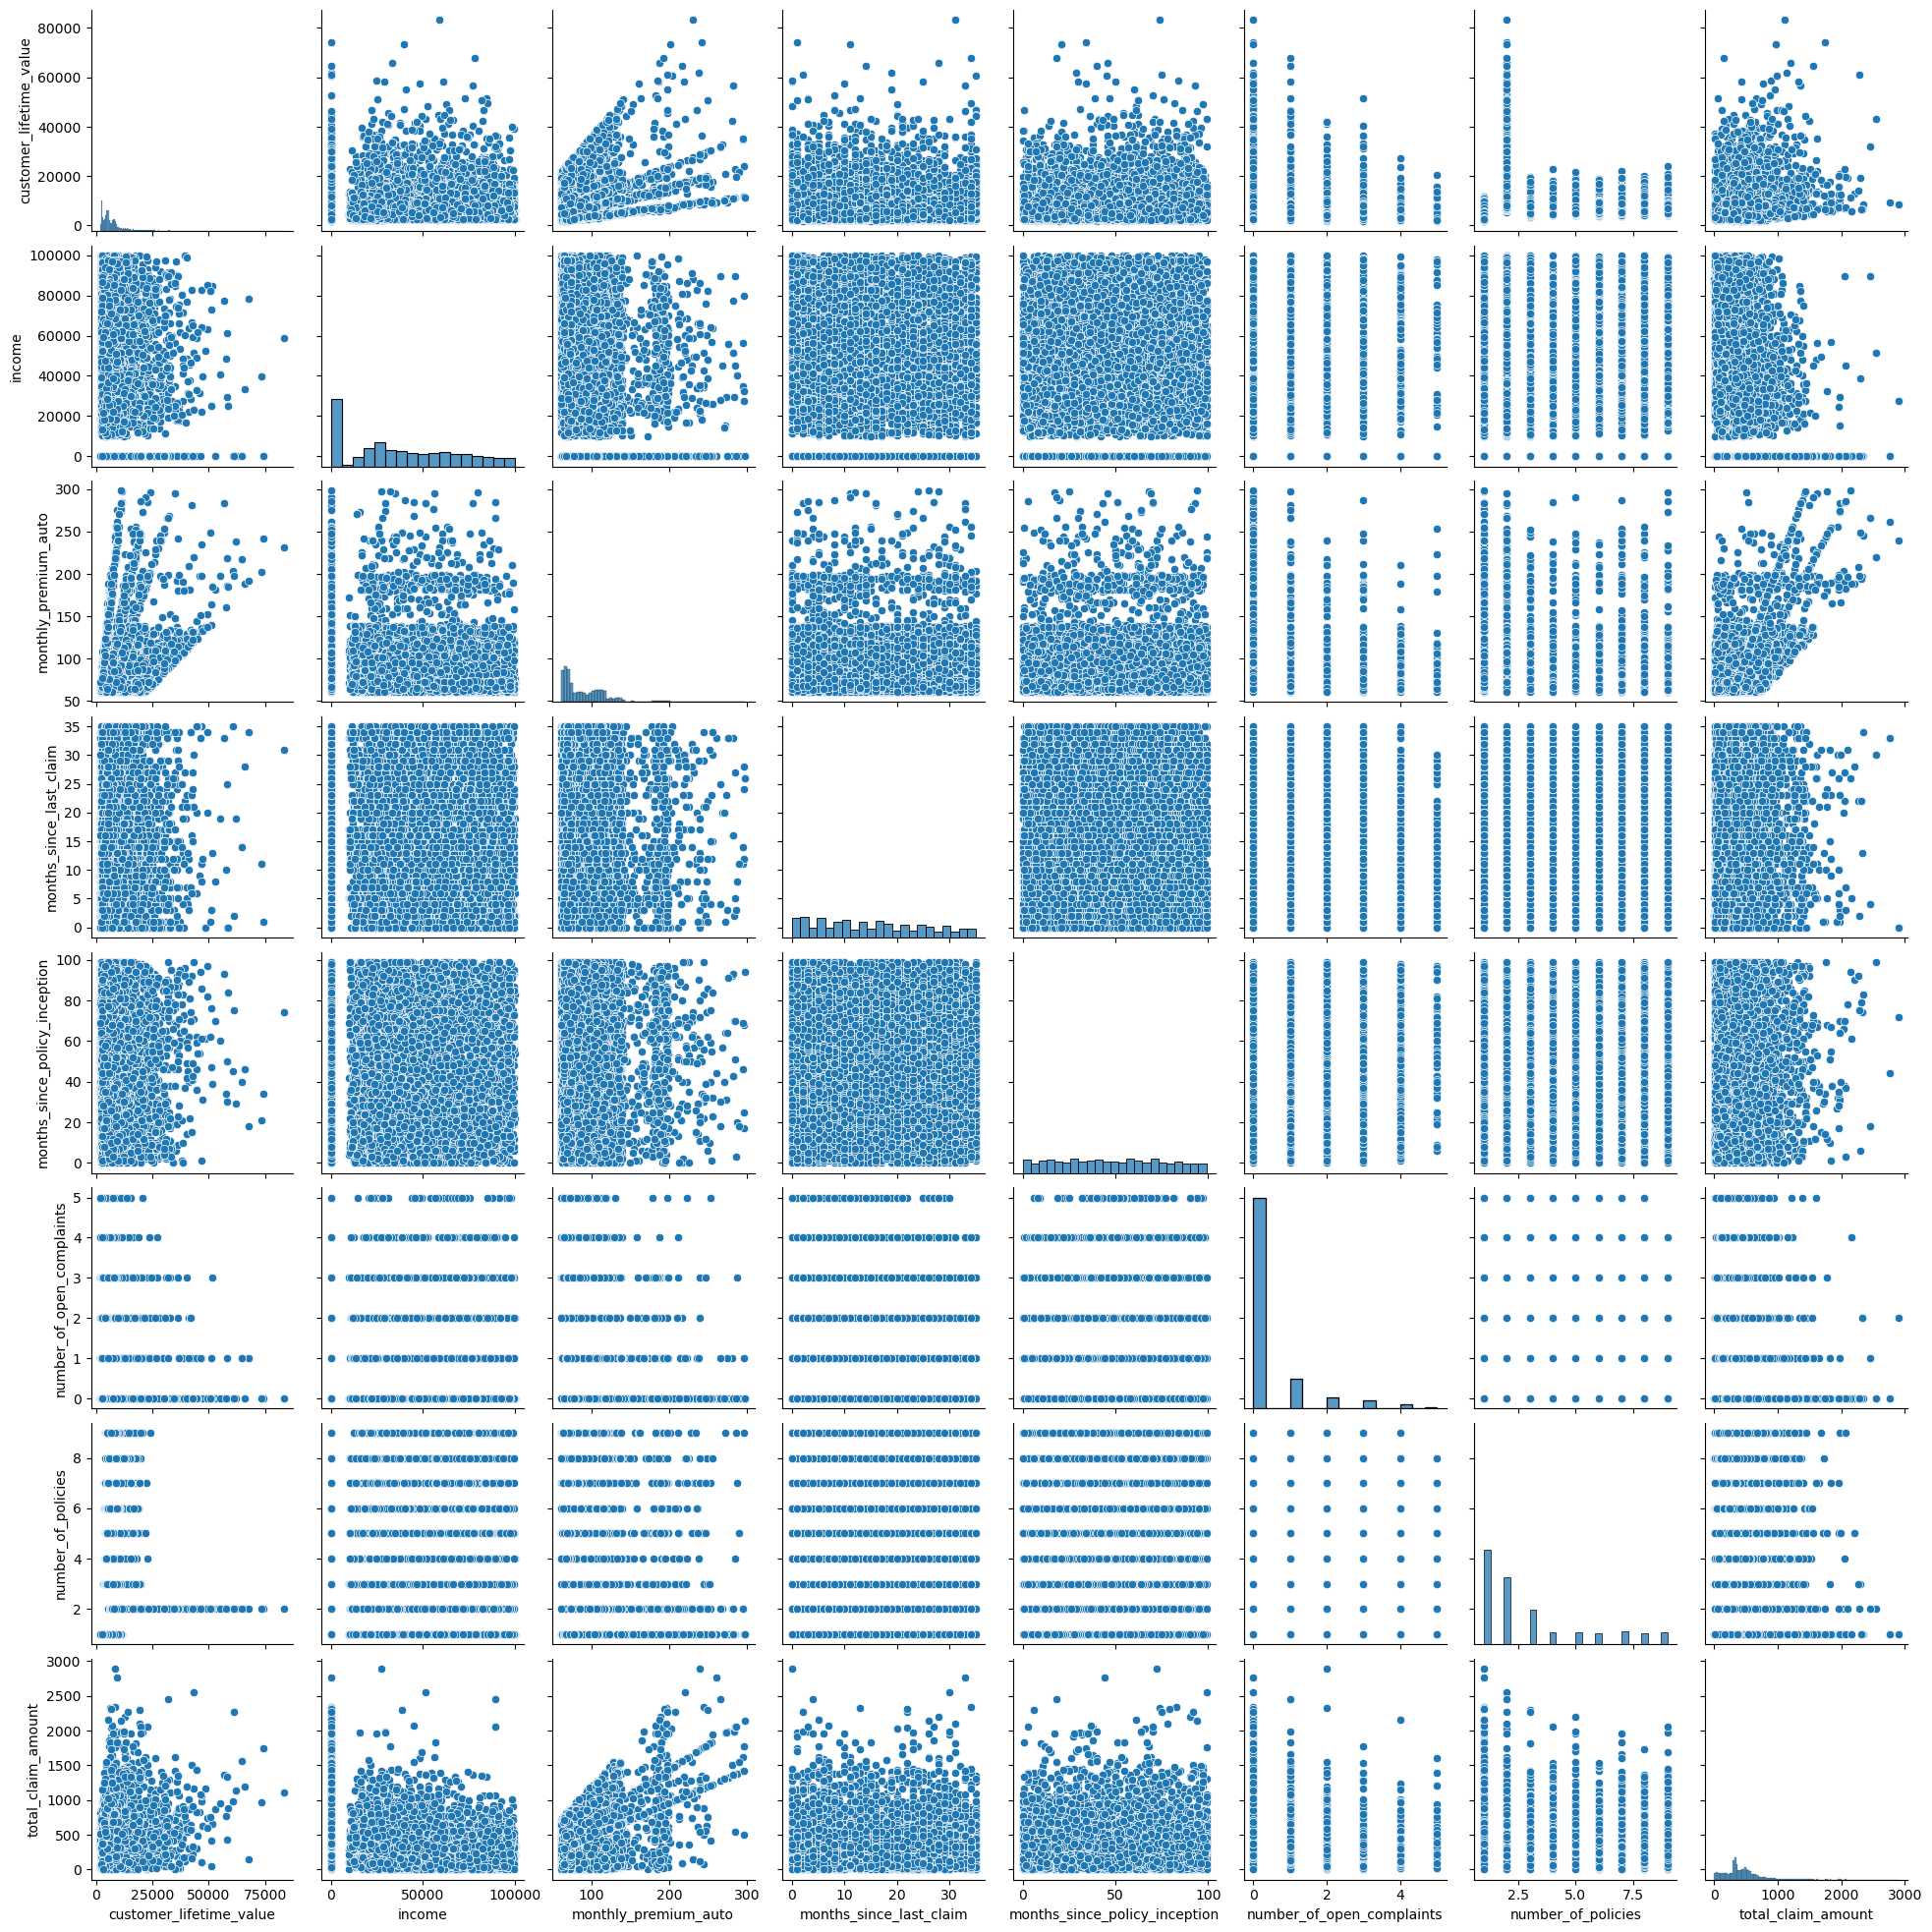

In [18]:
#Let's see how every numerical number correlate with others. 
sns.pairplot(num)

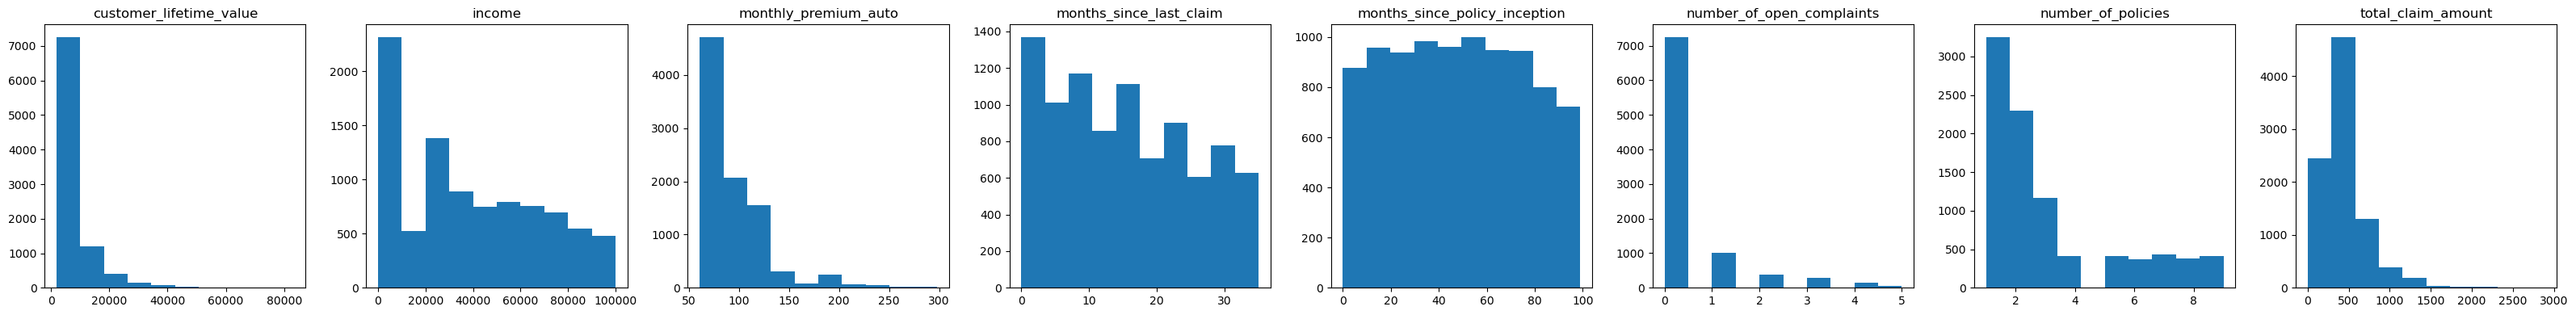

In [19]:
#Another option is to see each value separetely. 
continuous_cols = data.select_dtypes(include=['float64', 'int64'], exclude=['bool']).columns
n_rows = 1
n_cols = len(continuous_cols)
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(n_cols * 4, n_rows * 4))

for i, col in enumerate(continuous_cols):
    ax = axes[i]
    ax.hist(data[col], bins=10)
    ax.set_title(col)

plt.tight_layout()
plt.show()

In [20]:
# total counts of categoricals 
import plotly.express as px

for col in cat:
    fig = px.bar(data[col].value_counts(), x=data[col].value_counts().index, y=data[col].value_counts().values, color_discrete_sequence=['#FFC0CB'])
    
    # Add text annotations to each bar
    fig.update_traces(texttemplate='%{y}', textposition='outside')
    
    fig.update_layout(title=f'{col} Counts')
    fig.show()

In [21]:
# categoricals versus target
for col in cat:
    fig = px.bar(data.groupby(col)['total_claim_amount'].mean().reset_index(), 
                 x=col, y='total_claim_amount', color_discrete_sequence=['#A06CD5'])
    
    # Add text annotations to each bar
    fig.update_traces(texttemplate='%{y:.2f}', textposition='outside')
    
    fig.update_layout(title=f'{col} vs Total Claim Amount')
    fig.show()

***

# <span style="color:rgb(255, 0, 255)">LAB TIME BABY </span>

In [22]:
from IPython.display import Image
Image(url='https://media.giphy.com/media/LUhUvH4BsfE9USnlPd/giphy.gif')


### <span style="color:rgb(255, 0, 255)">1. Start removing outliers</span>

<AxesSubplot:xlabel='total_claim_amount', ylabel='vehicle_size'>

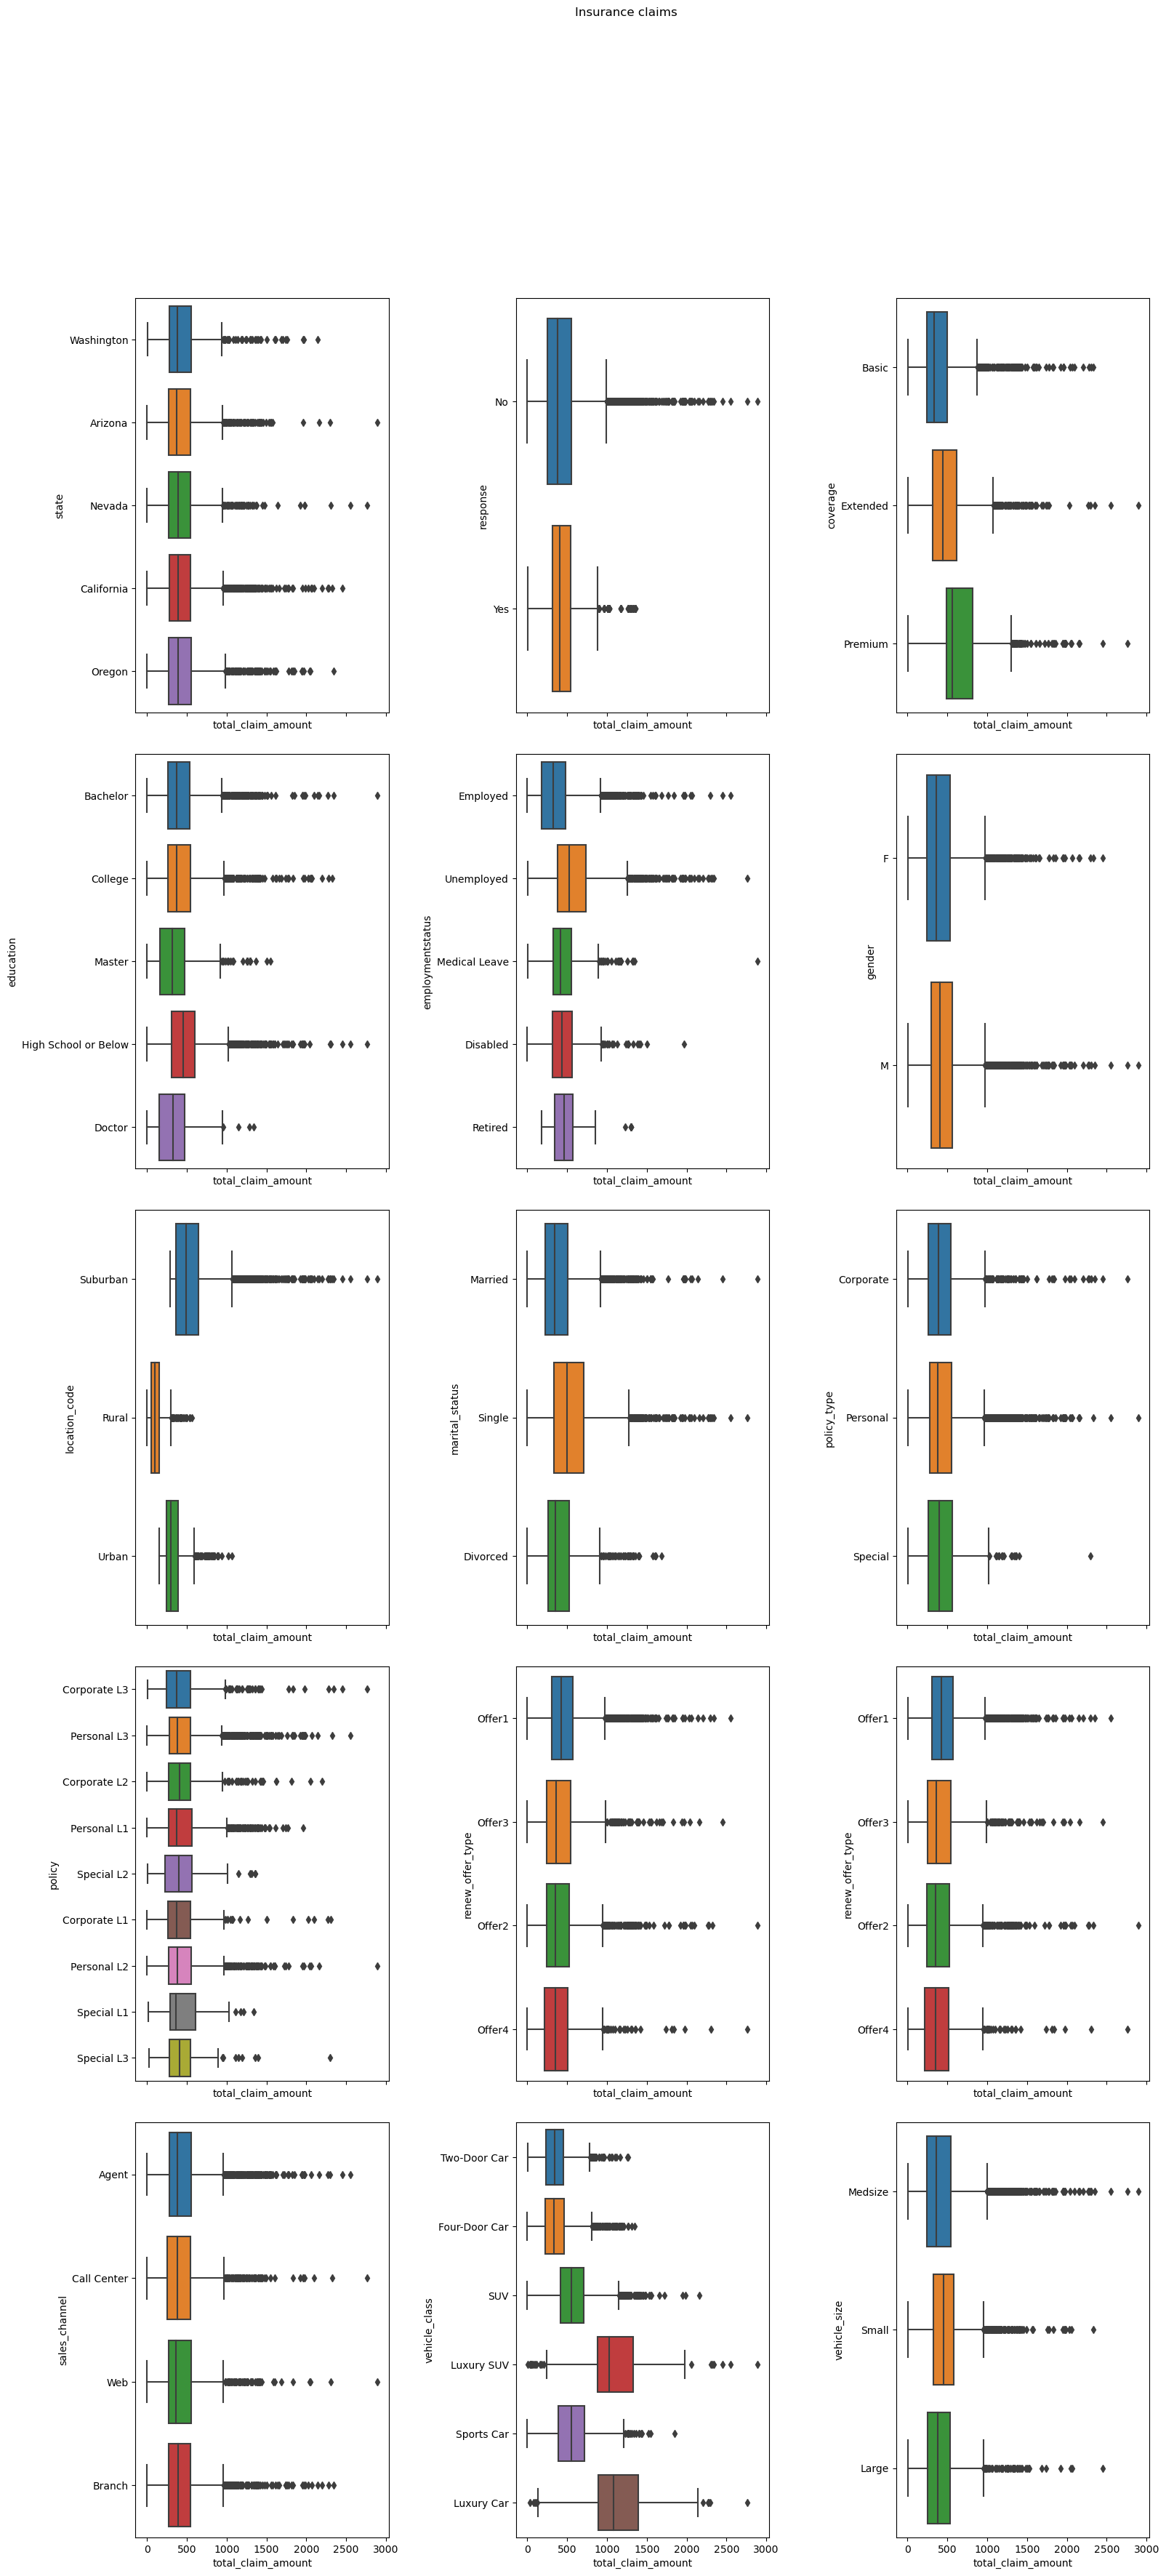

In [23]:
# First, let's see how this look like
fig, axes = plt.subplots(5, 3, sharex=True, figsize=(18,40)) # 5 rows  x 3 columns

fig.subplots_adjust(hspace=0.1, wspace=.5) # ensure that the plots do not overlap

fig.suptitle('Insurance claims')

sns.boxplot(ax=axes[0, 0], data=data, x="total_claim_amount", y="state")
sns.boxplot(ax=axes[0, 1], data=data, x="total_claim_amount", y="response")
sns.boxplot(ax=axes[0, 2], data=data, x="total_claim_amount", y="coverage")
sns.boxplot(ax=axes[1, 0], data=data, x="total_claim_amount", y="education")
sns.boxplot(ax=axes[1, 1], data=data, x="total_claim_amount", y="employmentstatus")
sns.boxplot(ax=axes[1, 2], data=data, x="total_claim_amount", y="gender")
sns.boxplot(ax=axes[2, 0], data=data, x="total_claim_amount", y="location_code")
sns.boxplot(ax=axes[2, 1], data=data, x="total_claim_amount", y="marital_status")
sns.boxplot(ax=axes[2, 2], data=data, x="total_claim_amount", y="policy_type")
sns.boxplot(ax=axes[3, 0], data=data, x="total_claim_amount", y="policy")
sns.boxplot(ax=axes[3, 1], data=data, x="total_claim_amount", y="renew_offer_type")
sns.boxplot(ax=axes[3, 2], data=data, x="total_claim_amount", y="renew_offer_type")
sns.boxplot(ax=axes[4, 0], data=data, x="total_claim_amount", y="sales_channel")
sns.boxplot(ax=axes[4, 1], data=data, x="total_claim_amount", y="vehicle_class")
sns.boxplot(ax=axes[4, 2], data=data, x="total_claim_amount", y="vehicle_size")

#Source: https://dev.to/thalesbruno/subplotting-with-matplotlib-and-seaborn-5ei8

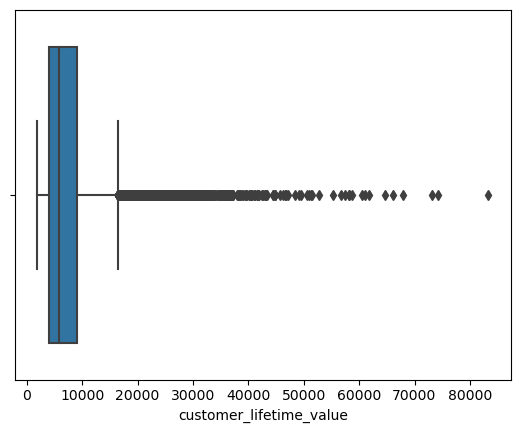

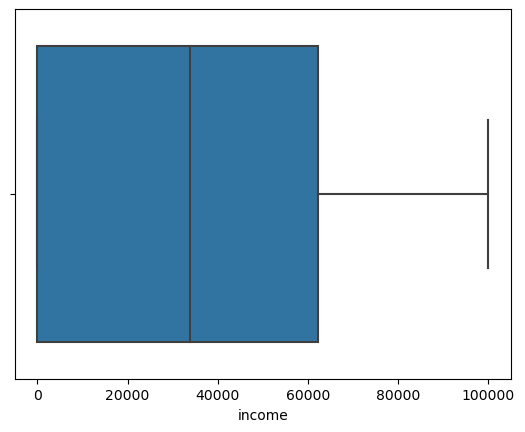

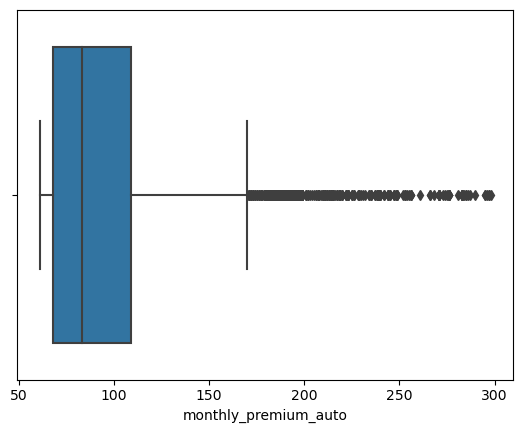

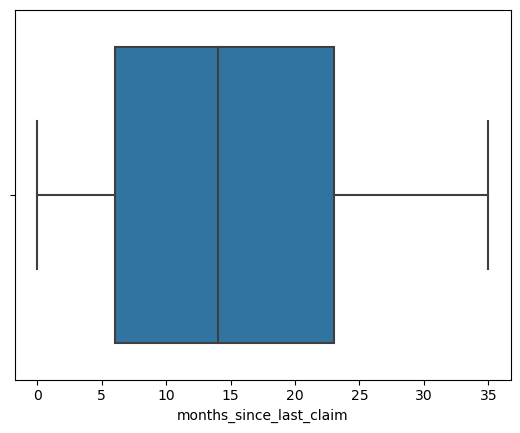

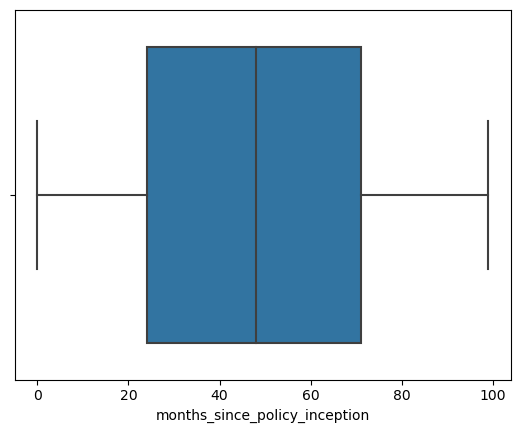

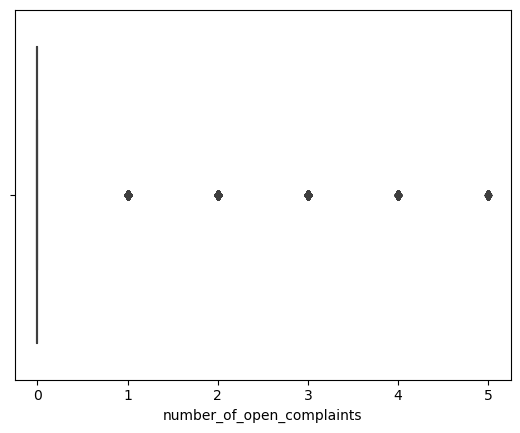

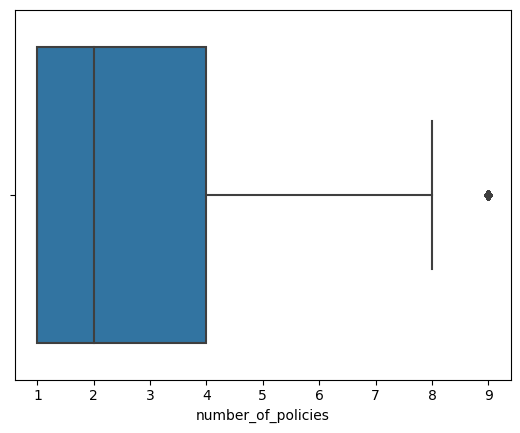

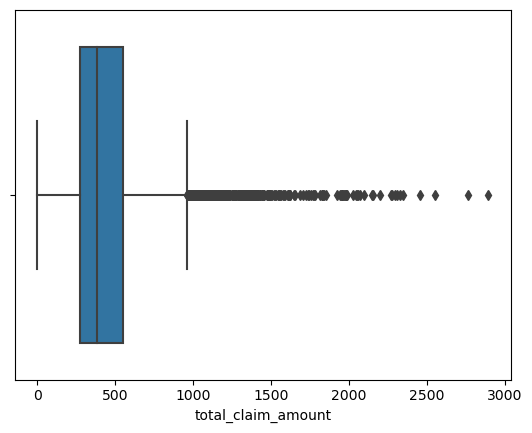

In [24]:
#Create a group of boxplots

for i, col in enumerate(num.columns):
    plt.figure(i)
    sns.boxplot(x=num[col] ,whis=1.5)

<span style="color:rgb(255, 0, 255)"> We shouldn't be removing outliers without any critical thinking.In this moment, the only ones that I would remove are the ones in number of policies
</span>

In [25]:
#This is what we did in previous labs and at this point its clearer for me than the function, but I will put a function below to do this.
iqr = np.percentile(data['number_of_policies'],75) - np.percentile(data['number_of_policies'],25)
upper_limit = np.percentile(data['number_of_policies'],75) + 1.5*iqr
lower_limit = np.percentile(data['number_of_policies'],25) - 1.5*iqr
data = data[(data['number_of_policies']>lower_limit) & (data['number_of_policies']<upper_limit)]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8718 entries, 0 to 9133
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          8718 non-null   object 
 1   customer_lifetime_value        8718 non-null   float64
 2   response                       8718 non-null   object 
 3   coverage                       8718 non-null   object 
 4   education                      8718 non-null   object 
 5   effective_to_date              8718 non-null   object 
 6   employmentstatus               8718 non-null   object 
 7   gender                         8718 non-null   object 
 8   income                         8718 non-null   int64  
 9   location_code                  8718 non-null   object 
 10  marital_status                 8718 non-null   object 
 11  monthly_premium_auto           8718 non-null   int64  
 12  months_since_last_claim        8718 non-null   i

In [26]:
# Define your function to remove outliers
def remove_outliers(dataframe, column, threshold=3):
    q1 = dataframe[column].quantile(0.25)
    q3 = dataframe[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (threshold * iqr)
    upper_bound = q3 + (threshold * iqr)
    filtered = dataframe[(dataframe[column] > lower_bound) & (dataframe[column] < upper_bound)]
    return filtered

# Apply the function to remove outliers for a specific column
#filtered_df = remove_outliers(df, 'column_name')

### <span style="color:rgb(255, 0, 255)">2. Create a copy of the dataframe for the data wrangling.
</span>

In [27]:
df = data.copy()

### <span style="color:rgb(255, 0, 255)">3. Normalize the continuous variables. You can use any one method you want.

</span>

In [28]:
num_df = df.select_dtypes(include = np.number)
num_df = num_df.drop(columns=['total_claim_amount']) #not include the target
cat_df = df.select_dtypes(include = np.object)

target = df['total_claim_amount']

In [29]:
cat_df.head()

state response  coverage education effective_to_date employmentstatus  \
0  Washington       No     Basic  Bachelor           2/24/11         Employed   
1     Arizona       No  Extended  Bachelor           1/31/11       Unemployed   
2      Nevada       No   Premium  Bachelor           2/19/11         Employed   
3  California       No     Basic  Bachelor           1/20/11       Unemployed   
4  Washington       No     Basic  Bachelor            2/3/11         Employed   

  gender location_code marital_status policy_type        policy  \
0      F      Suburban        Married   Corporate  Corporate L3   
1      F      Suburban         Single    Personal   Personal L3   
2      F      Suburban        Married    Personal   Personal L3   
3      M      Suburban        Married   Corporate  Corporate L2   
4      M         Rural         Single    Personal   Personal L1   

  renew_offer_type sales_channel  vehicle_class vehicle_size  
0           Offer1         Agent   Two-Door Car      Medsize  
1           Offer3         Agent  Four-Door Car      Medsize  
2           Offer1         Agent   Two-Door Car      Medsize  
3           Offer1   Call Center            SUV      Medsize  
4           Offer1         Agent  Four-Door Car      Medsize

In [30]:
#Do the distributions for different numerical variables look like a normal distribution
# we are not going to change anything in total claim amount, that's why we will use X_num_2

transformer = MinMaxScaler().fit(num_df)
num_minmax = transformer.transform(num_df)
num_norm = pd.DataFrame(num_minmax,columns=num_df.columns)
num_normalize = num_norm.copy()

### <span style="color:rgb(255, 0, 255)">4. Encode the categorical variables & 6. Since the model will only accept numerical data, check and make sure that every column is numerical, if some are not, change it using encoding.

Hint for Categorical Variables

    You should deal with the categorical variables as shown below (for ordinal encoding, dummy code has been provided as well):
    One hot to state
    One hot to marital status
    One hot to policy type
    One hot to policy
    One hot to renew offer
    One hot to sales channel
    One hot vehicle class
    Ordinal vehicle size
    Ordinal to coverage
    Ordinal to employmentstatus
    Ordinal to location code

    data["coverage"] = data["coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})
    given that column "coverage" in the dataframe "data" has three categories:
    "basic", "extended", and "premium" and values are to be represented in the same order.
</span>

In [31]:
#For one hot we will use get dummies
cat_df_encoded = cat_df.copy()
cat_df_encoded =pd.get_dummies(cat_df_encoded[['state','marital_status','policy_type','renew_offer_type','sales_channel','vehicle_class']])
cat_df_encoded.head()

state_Arizona  state_California  state_Nevada  state_Oregon  \
0              0                 0             0             0   
1              1                 0             0             0   
2              0                 0             1             0   
3              0                 1             0             0   
4              0                 0             0             0   

   state_Washington  marital_status_Divorced  marital_status_Married  \
0                 1                        0                       1   
1                 0                        0                       0   
2                 0                        0                       1   
3                 0                        0                       1   
4                 1                        0                       0   

   marital_status_Single  policy_type_Corporate  policy_type_Personal  \
0                      0                      1                     0   
1                      1                      0                     1   
2                      0                      0                     1   
3                      0                      1                     0   
4                      1                      0                     1   

   policy_type_Special  renew_offer_type_Offer1  renew_offer_type_Offer2  \
0                    0                        1                        0   
1                    0                        0                        0   
2                    0                        1                        0   
3                    0                        1                        0   
4                    0                        1                        0   

   renew_offer_type_Offer3  renew_offer_type_Offer4  sales_channel_Agent  \
0                        0                        0                    1   
1                        1                        0                    1   
2                        0                        0                    1   
3                        0                        0                    0   
4                        0                        0                    1   

   sales_channel_Branch  sales_channel_Call Center  sales_channel_Web  \
0                     0                          0                  0   
1                     0                          0                  0   
2                     0                          0                  0   
3                     0                          1                  0   
4                     0                          0                  0   

   vehicle_class_Four-Door Car  vehicle_class_Luxury Car  \
0                            0                         0   
1                            1                         0   
2                            0                         0   
3                            0                         0   
4                            1                         0   

   vehicle_class_Luxury SUV  vehicle_class_SUV  vehicle_class_Sports Car  \
0                         0                  0                         0   
1                         0                  0                         0   
2                         0                  0                         0   
3                         0                  1                         0   
4                         0                  0                         0   

   vehicle_class_Two-Door Car  
0                           1  
1                           0  
2                           1  
3                           0  
4                           0

In [32]:
cat_df['vehicle_size'].value_counts()

Medsize    6125
Small      1692
Large       901
Name: vehicle_size, dtype: int64

In [33]:
cat_df['coverage'].value_counts()

Basic       5306
Extended    2626
Premium      786
Name: coverage, dtype: int64

In [34]:
cat_df['employmentstatus'].value_counts()

Employed         5442
Unemployed       2211
Medical Leave     411
Disabled          386
Retired           268
Name: employmentstatus, dtype: int64

In [35]:
cat_df['location_code'].value_counts()

Suburban    5508
Rural       1693
Urban       1517
Name: location_code, dtype: int64

In [37]:
# For ordinal we will asign numbers
cat_df['vehicle_size_enc'] = cat_df["vehicle_size"].map({"Small" : 0, "Medsize" : 1, "Large" : 2})
cat_df['coverage_enc'] = cat_df["coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})
cat_df['employmentstatus_enc'] = cat_df["employmentstatus"].map({"Employed" : 0, "Unemployed" : 1, "Medical Leave" : 2, "Disabled" : 2, "Retired" : 2})
cat_df['location_code_enc'] = cat_df["location_code"].map({"Rural" : 0, "Suburban" : 1, "Urban" : 2})
cat_df.head()

state response  coverage education effective_to_date  \
0  Washington       No     Basic  Bachelor           2/24/11   
1     Arizona       No  Extended  Bachelor           1/31/11   
2      Nevada       No   Premium  Bachelor           2/19/11   
3  California       No     Basic  Bachelor           1/20/11   
4  Washington       No     Basic  Bachelor            2/3/11   

   employmentstatus gender location_code marital_status policy_type  \
0                 0      F      Suburban        Married   Corporate   
1                 1      F      Suburban         Single    Personal   
2                 0      F      Suburban        Married    Personal   
3                 1      M      Suburban        Married   Corporate   
4                 0      M         Rural         Single    Personal   

         policy renew_offer_type sales_channel  vehicle_class vehicle_size  \
0  Corporate L3           Offer1         Agent   Two-Door Car      Medsize   
1   Personal L3           Offer3         Agent  Four-Door Car      Medsize   
2   Personal L3           Offer1         Agent   Two-Door Car      Medsize   
3  Corporate L2           Offer1   Call Center            SUV      Medsize   
4   Personal L1           Offer1         Agent  Four-Door Car      Medsize   

   vehicle_size_enc  coverage_enc  location_code_enc  employmentstatus_enc  
0                 1             0                  1                   NaN  
1                 1             1                  1                   NaN  
2                 1             2                  1                   NaN  
3                 1             0                  1                   NaN  
4                 1             0                  0                   NaN

### <span style="color:rgb(255, 0, 255)">5. The time variable can be useful. Try to transform its data into a useful one. Hint: Day week and month as integers might be useful.
</span>

In [ ]:
df["effective_to_date"] = pd.to_datetime(df["effective_to_date"], errors='coerce')

In [ ]:
df["effective_to_date"].info()

***